In [ ]:
# I first mounted my google drive.
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries.
import pandas as pd

# Then imported the dataset and used pd.read to read the dataset.
path = "/content/drive/MyDrive/CORD19 datasets - Sheet 1.csv"
df = pd.read_csv(path)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16070 entries, 0 to 16069
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cord_uid             16070 non-null  object
 1   paper_url            16070 non-null  object
 2   paper_title          16070 non-null  object
 3   dataset_url          16070 non-null  object
 4   dataset_name         16070 non-null  object
 5   alternate_name       132 non-null    object
 6   description          14126 non-null  object
 7   author_list          6052 non-null   object
 8   last_updated         12548 non-null  object
 9   license              12788 non-null  object
 10  source_organization  12518 non-null  object
 11  doi                  5923 non-null   object
 12  compact_identifier   2080 non-null   object
 13  data_download        5500 non-null   object
dtypes: object(14)
memory usage: 1.7+ MB


In [ ]:
# Quick look at the dataset.
df.head()
df.info()       # structure & dtypes
df.describe()   # summary of numerical cols
df.shape        # rows, cols
df.isna().sum() # missing values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16070 entries, 0 to 16069
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cord_uid             16070 non-null  object
 1   paper_url            16070 non-null  object
 2   paper_title          16070 non-null  object
 3   dataset_url          16070 non-null  object
 4   dataset_name         16070 non-null  object
 5   alternate_name       132 non-null    object
 6   description          14126 non-null  object
 7   author_list          6052 non-null   object
 8   last_updated         12548 non-null  object
 9   license              12788 non-null  object
 10  source_organization  12518 non-null  object
 11  doi                  5923 non-null   object
 12  compact_identifier   2080 non-null   object
 13  data_download        5500 non-null   object
dtypes: object(14)
memory usage: 1.7+ MB


,0
cord_uid,0
paper_url,0
paper_title,0
dataset_url,0
dataset_name,0
alternate_name,15938
description,1944
author_list,10018
last_updated,3522
license,3282


In [ ]:
df_clean = df.dropna(subset=['paper_title']).copy()
df_clean['last_updated'] = pd.to_datetime(df_clean['last_updated'], errors='coerce')
df_clean['year'] = df_clean['last_updated'].dt.year


In [ ]:
important_cols = ['paper_title', 'last_updated', 'description', 'author_list',
                  'source_organization', 'doi']

df_clean[important_cols].isna().sum()


,0
paper_title,0
last_updated,16001
description,1944
author_list,10018
source_organization,3552
doi,10147


In [ ]:
(df_clean[important_cols].isna().mean() * 100).round(2)


,0
paper_title,0.00
last_updated,99.57
description,12.10
author_list,62.34
source_organization,22.10
doi,63.14


In [ ]:
# Seeing which columns are actually numeric.
df_clean.select_dtypes(include='number').columns


Index(['year'], dtype='object')

In [ ]:
# Creating numeric column.
df_clean['description_len'] = df_clean['description'].fillna('').str.len()


In [ ]:
# Summary for all numeric columns.
df_clean.describe()


,last_updated,year,description_len
count,69,69.000000,16070.000000
mean,2004-08-05 12:10:26.086956544,2004.594203,794.587492
min,1791-01-01 00:00:00,1791.000000,0.000000
25%,2014-01-01 00:00:00,2014.000000,132.000000
50%,2014-01-01 00:00:00,2014.000000,442.000000
75%,2016-01-01 00:00:00,2016.000000,1455.750000
max,2019-01-01 00:00:00,2019.000000,12227.000000
std,NaN,40.206935,883.225342


In [ ]:
# Converting the date column to datetime.
# Make sure you have a cleaned DataFrame first.
df_clean = df.dropna(subset=['paper_title']).copy()

# Convert the date-like column.
df_clean['last_updated'] = pd.to_datetime(df_clean['last_updated'], errors='coerce')


In [ ]:
# Extracting the year (or month/day) for analysis.
df_clean['year'] = df_clean['last_updated'].dt.year
df_clean['month'] = df_clean['last_updated'].dt.month


In [ ]:
# Creating new derived columns.
# Word count for description.
df_clean['description_word_count'] = (
    df_clean['description']
    .fillna('')
    .str.split()
    .str.len()
)

# Word count for paper_title.
df_clean['title_word_count'] = (
    df_clean['paper_title']
    .str.split()
    .str.len()
)


In [ ]:
df_clean[['paper_title', 'last_updated', 'year',
          'description_word_count', 'title_word_count']].head()


,paper_title,last_updated,year,description_word_count,title_word_count
0,"Nipah virus: epidemiology, pathology, immunobi...",2016-01-01,2016.0,36,18
1,Novel approaches and challenges to treatment o...,NaT,NaN,194,10
2,"Verdinexor, a Novel Selective Inhibitor of Nuc...",NaT,NaN,53,18
3,Climate change and infectious diseases: What c...,2017-01-01,2017.0,61,9
4,Increased Epitope-Specific CD8(+) T Cells Prev...,NaT,NaN,76,16


In [ ]:
# Counting the number of papers for each year.
papers_per_year = df_clean['year'].value_counts().sort_index()

print(papers_per_year)


year
1791.0     2
1937.0     2
1965.0     1
1976.0     1
1993.0     1
2003.0     1
2011.0     1
2012.0     2
2014.0    34
2015.0     3
2016.0     6
2017.0     4
2018.0     5
2019.0     6
Name: count, dtype: int64


<Axes: title={'center': 'Number of Papers per Year'}, xlabel='year'>

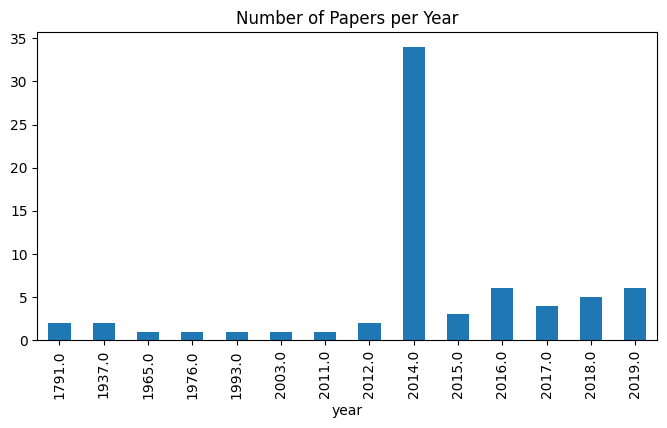

In [ ]:
# Quick plot for the same.
papers_per_year.plot(kind='bar', figsize=(8,4), title='Number of Papers per Year')


In [ ]:
# Identifying top journals.
top_sources = df_clean['source_organization'].value_counts().head(10)
print(top_sources)


source_organization
Rat Genome Database                        4897
PLOS ONE                                   2481
Alliance of Genome Resources               1956
PLOS Pathogens                             1681
PLOS Neglected Tropical Diseases            359
PLOS Computational Biology                  203
PLOS Biology                                159
PLOS Medicine                               155
Biological Magnetic Resonance Data Bank     123
PLOS Genetics                                82
Name: count, dtype: int64


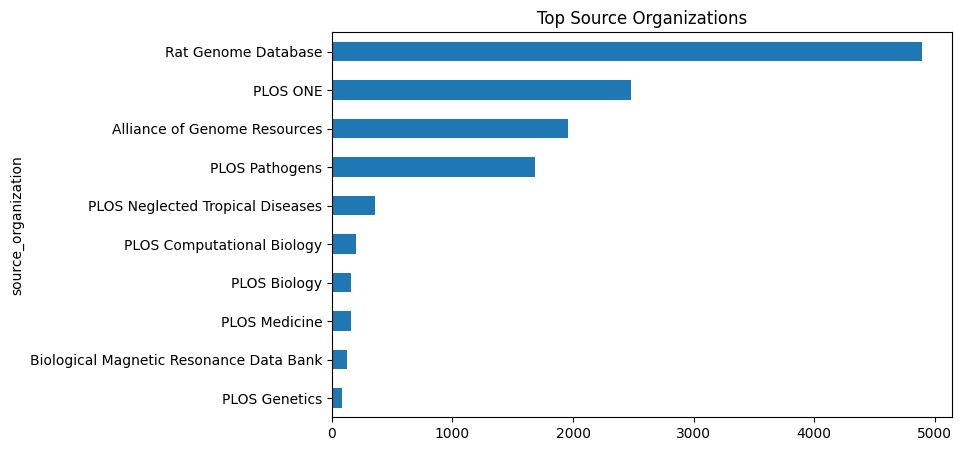

In [ ]:
# Its visualization.
import matplotlib.pyplot as plt

top_sources.plot(kind='barh', figsize=(8,5), title='Top Source Organizations')
plt.gca().invert_yaxis()  # largest on top
plt.show()


In [ ]:
# Finding most frequent words in titles.
import re
from collections import Counter

# Clean & split each title into words
words_series = df_clean['paper_title'].dropna().str.lower().apply(
    lambda x: re.findall(r'\b\w+\b', x)
)

# Flatten the list of lists and count
word_counts = Counter([w for sublist in words_series for w in sublist])

# Show the 20 most common words
print(word_counts.most_common(20))


[('of', 12885), ('and', 9244), ('the', 8171), ('in', 7161), ('a', 3993), ('virus', 3920), ('to', 2899), ('for', 2728), ('with', 1807), ('host', 1767), ('viral', 1732), ('cells', 1632), ('infection', 1580), ('respiratory', 1521), ('human', 1488), ('protein', 1481), ('influenza', 1380), ('analysis', 1372), ('rna', 1248), ('by', 1241)]


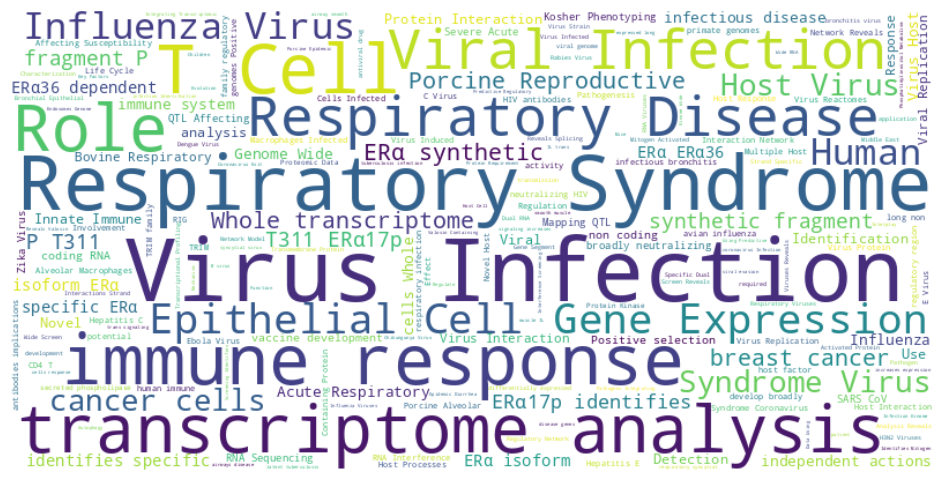

In [ ]:
# Creating a word cloud (Just for fun).
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df_clean['paper_title'].dropna())
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


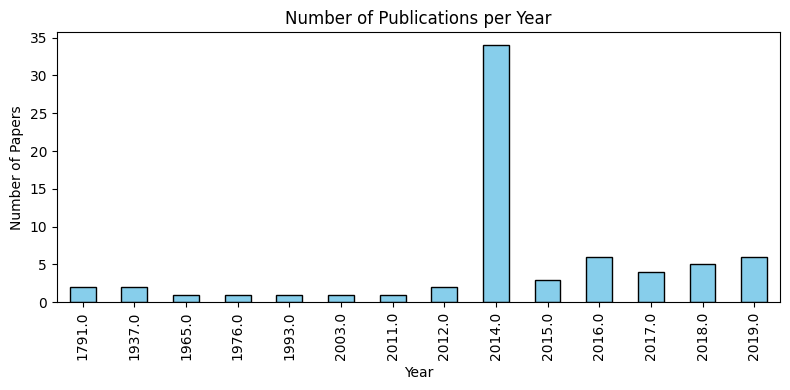

In [ ]:
# Plotting number of publications over time.
import matplotlib.pyplot as plt

# Count papers per year.
papers_per_year = df_clean['year'].value_counts().sort_index()

plt.figure(figsize=(8,4))
papers_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.tight_layout()
plt.show()


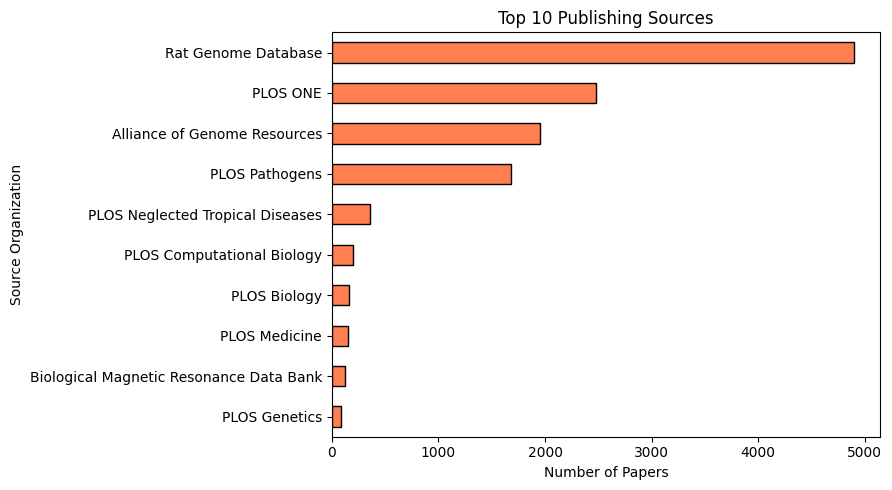

In [ ]:
# Bar chart of top publishing journals (source organizations).
top_sources = df_clean['source_organization'].value_counts().head(10)

plt.figure(figsize=(9,5))
top_sources.plot(kind='barh', color='coral', edgecolor='black')
plt.title('Top 10 Publishing Sources')
plt.xlabel('Number of Papers')
plt.ylabel('Source Organization')
plt.gca().invert_yaxis()   # largest on top
plt.tight_layout()
plt.show()


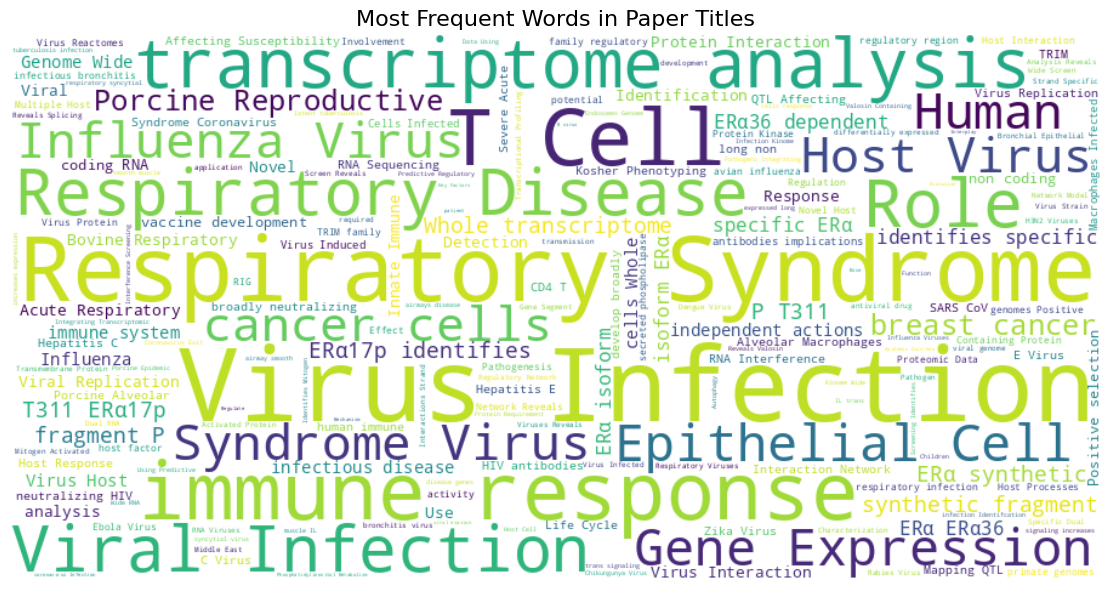

In [ ]:
# Word cloud of paper titles.
from wordcloud import WordCloud

text = " ".join(df_clean['paper_title'].dropna())

wc = WordCloud(width=900, height=450, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Paper Titles", fontsize=16)
plt.tight_layout()
plt.show()


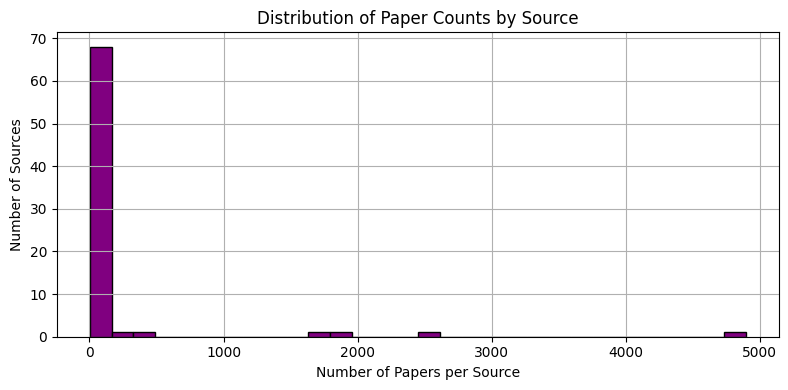

In [ ]:
source_counts = df_clean['source_organization'].value_counts()

plt.figure(figsize=(8,4))
source_counts[source_counts > 1].hist(bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Paper Counts by Source')
plt.xlabel('Number of Papers per Source')
plt.ylabel('Number of Sources')
plt.tight_layout()
plt.show()


In [ ]:
# Installing streamlit.
!pip install streamlit wordcloud matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.8 MB/s eta 0:00:00


2025-09-20 16:44:08.271 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-09-20 16:44:08.273 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-09-20 16:44:08.275 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 16:44:08.397 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-20 16:44:08.400 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 16:44:08.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 16:44:08.403 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 16:44:08.967 Thread 'Thread-5': missing 

DeltaGenerator()

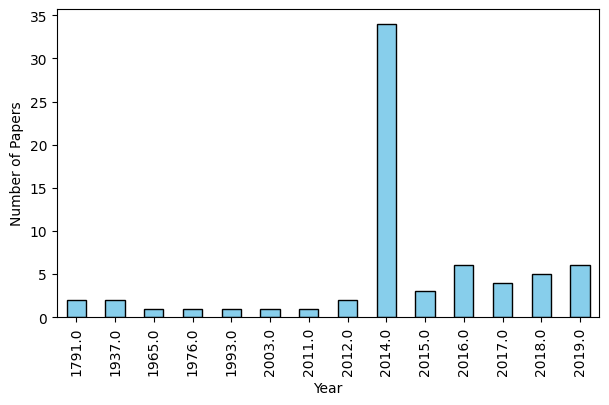

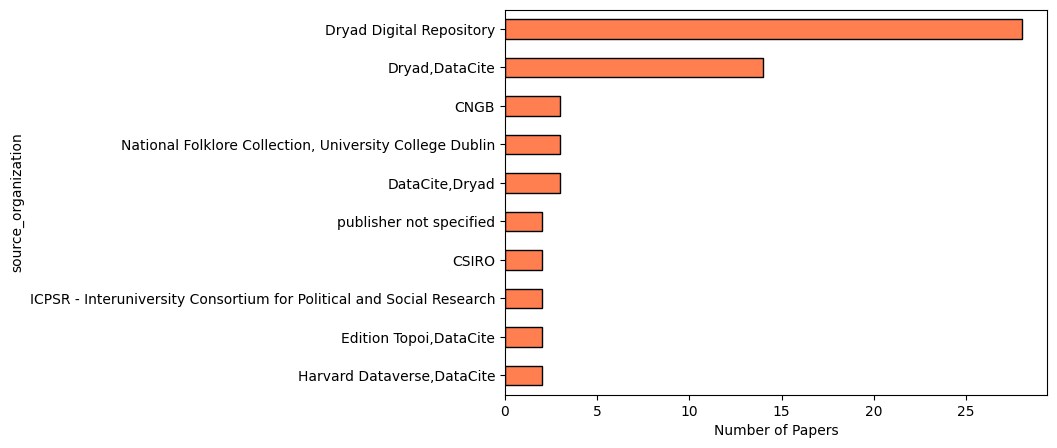

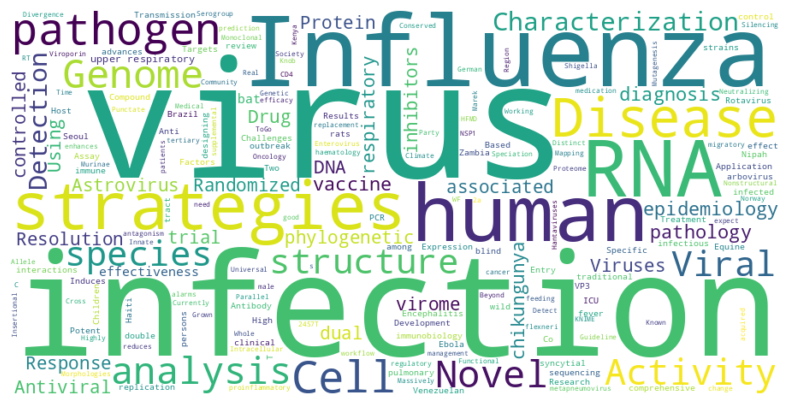

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# -------------------------------
#  Load & prepare the data
# -------------------------------
@st.cache_data
def load_data():
    df = pd.read_csv("/content/drive/MyDrive/CORD19 datasets - Sheet 1.csv")
    df = df.dropna(subset=['paper_title']).copy()
    df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
    df['year'] = df['last_updated'].dt.year
    return df

df = load_data()

# -------------------------------
#  Layout & description
# -------------------------------
st.title("CORD-19 Data Explorer")
st.write(
    """
    Interactive exploration of your CORD-19 dataset.

    - Filter by year
    - View top publishing sources
    - See common words in paper titles
    - Inspect raw data
    """
)

# -------------------------------
#  Sidebar filters
# -------------------------------
min_year = int(df['year'].min())
max_year = int(df['year'].max())

year_range = st.slider(
    "Select publication year range",
    min_value=min_year,
    max_value=max_year,
    value=(min_year, max_year)
)

sources = st.multiselect(
    "Filter by source organization (optional)",
    options=sorted(df['source_organization'].dropna().unique()),
    default=None
)

# -------------------------------
#  Apply filters
# -------------------------------
filtered = df[
    (df['year'].between(year_range[0], year_range[1]))
]

if sources:
    filtered = filtered[filtered['source_organization'].isin(sources)]

st.subheader("Data sample")
st.dataframe(filtered.head())

# -------------------------------
#  Visualizations
# -------------------------------
st.subheader("Number of Publications per Year")
papers_per_year = filtered['year'].value_counts().sort_index()

fig1, ax1 = plt.subplots(figsize=(7,4))
papers_per_year.plot(kind='bar', color='skyblue', ax=ax1, edgecolor='black')
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Papers")
st.pyplot(fig1)

st.subheader("Top Publishing Sources")
top_sources = (
    filtered['source_organization']
    .value_counts()
    .head(10)
)

fig2, ax2 = plt.subplots(figsize=(7,5))
top_sources.plot(kind='barh', ax=ax2, color='coral', edgecolor='black')
ax2.invert_yaxis()
ax2.set_xlabel("Number of Papers")
st.pyplot(fig2)

st.subheader("Word Cloud of Paper Titles")
all_titles = " ".join(filtered['paper_title'].dropna())
wc = WordCloud(width=900, height=450, background_color="white").generate(all_titles)

fig3, ax3 = plt.subplots(figsize=(10,5))
ax3.imshow(wc, interpolation="bilinear")
ax3.axis("off")
st.pyplot(fig3)
